<a href="https://colab.research.google.com/github/SarthakPradhan/Kaggle/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
fashion = pd.read_csv("/content/gdrive/MyDrive/KaggleDatasets/fashion_mnist/fashion-mnist_train.csv")
fashion_test = pd.read_csv("/content/gdrive/MyDrive/KaggleDatasets/fashion_mnist/fashion-mnist_test.csv")

In [ ]:
fashion.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fashion, test_size=0.2, random_state=64)

In [ ]:
def show_images(imgs, rows):  
  for row in rows:
    img = (imgs.iloc[row].to_numpy().reshape((28,28)))

    plt.imshow(img, interpolation='nearest',cmap="gray")
    plt.show()
        
    

In [ ]:
Y_train = train_set.pop("label")
X_train = train_set/255


In [ ]:
Y_test = test_set.pop("label")
X_test = test_set/255

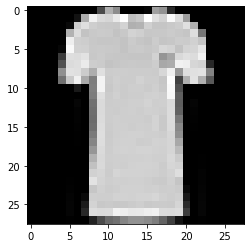

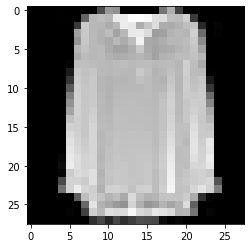

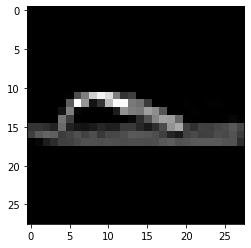

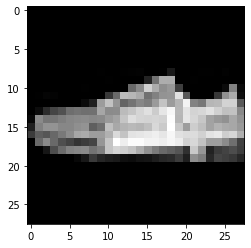

In [ ]:
show_images(X_train, [3,2,7,8]);

In [ ]:

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(random_state=42)

In [ ]:
Y_train

47180    7
33787    4
37345    6
50467    0
5924     7
        ..
49206    3
36006    9
22647    5
21478    3
39364    0
Name: label, Length: 48000, dtype: int64

In [ ]:
sgd_clf.predict(X_test)

array([8, 3, 3, ..., 3, 8, 5])

In [ ]:
Y_test.values

array([8, 3, 3, ..., 3, 8, 5])

In [ ]:
some_digit_scores = sgd_clf.decision_function(X_test)
some_digit_scores

array([[ -13895.74336916, -149962.42546229, -106888.60699576, ...,
        -154042.75739164,   65553.65408349, -140248.33118207],
       [  -4285.00858752,  -46483.57029223,  -40832.24495804, ...,
         -91355.76929836,  -39091.93104754,  -32124.41785589],
       [    977.53296671,  -14265.67438903,  -25592.40115582, ...,
        -102471.1816346 ,  -44448.2840244 ,  -56017.38561877],
       ...,
       [   -288.30963378,  -38381.16454209,  -57769.04877304, ...,
        -125851.05076474,  -86277.56230832,  -79045.7564176 ],
       [ -21229.8092331 ,  -91745.27462325, -110022.84076429, ...,
         -52126.35518027,   51029.88409266, -143420.77564138],
       [ -15031.91029684,  -37092.39012491,  -22145.35521685, ...,
         -11977.07098014,   -4839.24224519,  -17996.12186938]])

In [ ]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.825625 , 0.835375 , 0.8394375])

In [ ]:

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, Y_train):
clone_clf = clone(sgd_clf)
X_train_folds = X_train[train_index]
Y_train_folds = Y_train[train_index]
X_test_fold = X_train[test_index]
Y_test_fold = Y_train_5[test_index]
clone_clf.fit(X_train_folds, Y_train_folds)
Y_pred = clone_clf.predict(X_test_fold)
n_correct = sum(Y_pred == Y_test_fold)
print(n_correct / len(Y_pred)) # prints 0.9502, 0.96565 and 0.96495

IndentationError: ignored

In [ ]:
train_set = tf.convert_to_tensor(train_set)


In [ ]:
num_inputs = 784
num_outputs = 10

W = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs), mean=0, stddev=0.01))
b = tf.Variable(tf.zeros(num_outputs))

In [ ]:
def softmax(X):
    X_exp = tf.exp(X)
    partition = tf.reduce_sum(X_exp, 1, keepdims=True)
    return X_exp / partition  


In [ ]:
def net(X):
    return softmax(tf.matmul(tf.reshape(X, (-1, W.shape[0])), W) + b)


In [ ]:
y_hat = tf.constant([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = tf.constant([0, 2])
tf.boolean_mask(y_hat, tf.one_hot(y, depth=y_hat.shape[-1]))


In [ ]:
def cross_entropy(y_hat, y):
    return -tf.math.log(tf.boolean_mask(
        y_hat, tf.one_hot(y, depth=y_hat.shape[-1])))

#cross_entropy(y_hat, y)


In [ ]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = tf.argmax(y_hat, axis=1)
    cmp = tf.cast(y_hat, y.dtype) == y
    return float(tf.reduce_sum(tf.cast(cmp, y.dtype)))


In [ ]:
def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), size(y))
    return metric[0] / metric[1]

In [ ]:
class Accumulator: 
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
evaluate_accuracy(net, test_set)